# Set up the notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('../data/apartments_train.csv')
metadata = pd.read_json('../data/apartments_meta.json')

In [3]:
data.head()

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604


In [5]:
metadata

,name,type,desc,cats
0,id,integer_id,Unique ID for apartment,NaN
1,seller,categorical,The type of apartment seller,"[Owner, Company, Agents, Developer]"
2,price,real,The listed price of the apartment (TARGET),NaN
3,area_total,real,Total area of the apartment,NaN
4,area_kitchen,real,Total kitchen area in the apartment,NaN
5,area_living,real,Total living space area in the apartment,NaN
6,floor,integer,Primary building floor of the apartment,NaN
7,rooms,integer,Number of rooms in the apartment,NaN
8,layout,categorical,Overal apartment layout,"[Adjacent, Isolated, Adjacent_isolated]"
9,ceiling,real,Ceiling height in the apartment,NaN


In [6]:
col = data.columns
print(col)
y = data.price
list = ['id', 'price']
x = data.drop(list, axis=1)
x.head()

Index(['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living',
       'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared',
       'bathrooms_private', 'windows_court', 'windows_street', 'balconies',
       'loggias', 'condition', 'phones', 'building_id'],
      dtype='object')


,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,3.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076
1,NaN,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893
2,3.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176
3,NaN,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893
4,NaN,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604


# Price Distribution

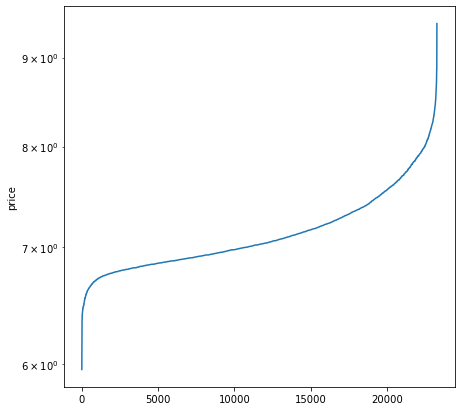

In [7]:
price_sorted = y.sort_values(ignore_index=True)
price_sorted.head()
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
plot1 = sns.lineplot(data=price_sorted, ax=ax)

# Data Description
See statistical values of features and price

In [10]:
x.describe()

,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
count,14455.000000,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000,23285.000000
mean,1.875683,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293,4844.089156
std,1.089518,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937,2790.676698
min,0.000000,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2426.000000
50%,2.000000,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4772.000000
75%,3.000000,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7340.000000
max,3.000000,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9735.000000


In [11]:
y.describe()

count    2.328500e+04
mean     2.355617e+07
std      5.264393e+07
min      9.000000e+05
25%      7.490000e+06
50%      1.064500e+07
75%      2.050000e+07
max      2.600000e+09
Name: price, dtype: float64

# Correlations
Look at some (manually chosen) features and try to determine if there is some correletion between them

## Total, kitchen and living area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


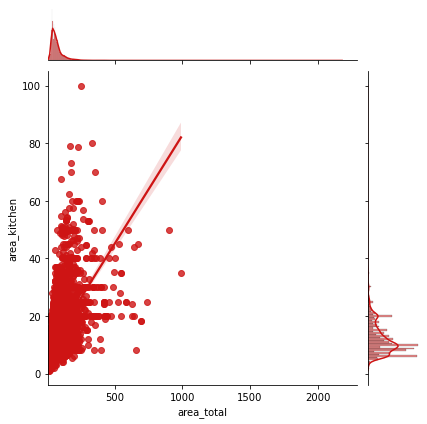

In [49]:
sns.jointplot(x.loc[:,'area_total'], x.loc[:,'area_kitchen'], kind="reg", color="#ce1414")

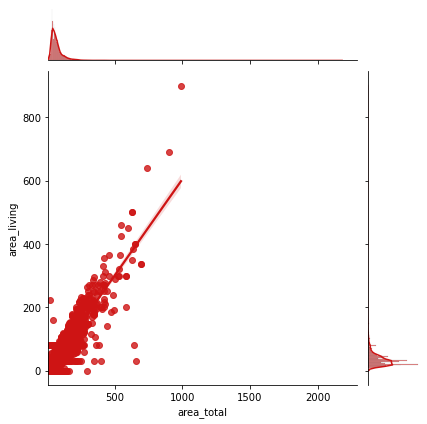

In [15]:
sns.jointplot(x=x.loc[:,'area_total'], y=x.loc[:,'area_living'], kind="reg", color="#ce1414")

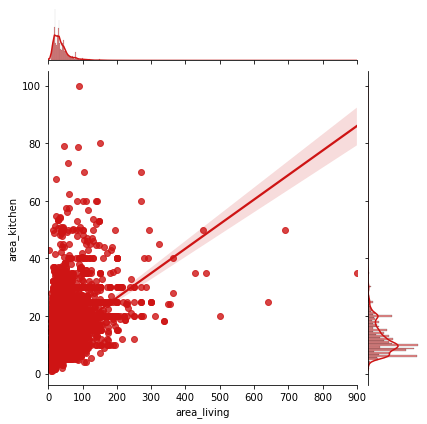

In [16]:
sns.jointplot(x=x.loc[:,'area_living'], y=x.loc[:,'area_kitchen'], kind="reg", color="#ce1414")

Total and kitchen area are not correlated, kitchen and living area aren't either, but living area and total offer some correlation

## Area and floor compared to the price

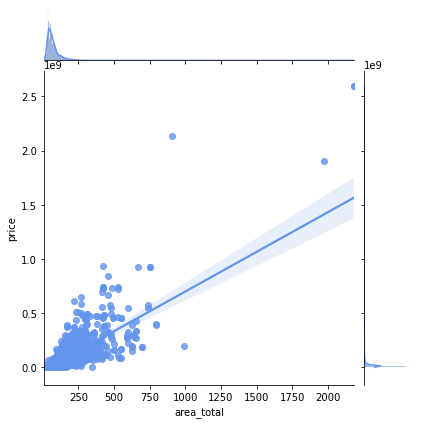

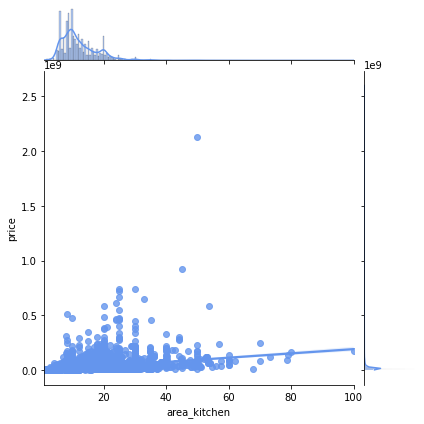

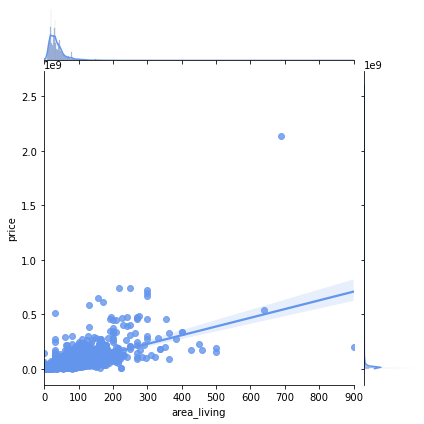

In [34]:
sns.jointplot(x=x.loc[:,'area_total'], y=y, kind="reg", color="#6495ED")
sns.jointplot(x=x.loc[:,'area_kitchen'], y=y, kind="reg", color="#6495ED")
sns.jointplot(x=x.loc[:,'area_living'], y=y, kind="reg", color="#6495ED")

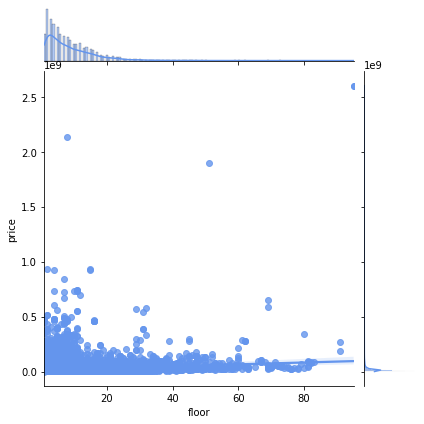

In [44]:
sns.jointplot(x=x.loc[:,'floor'], y=y, kind="reg", color="#6495ED")

# Just plot all jointplots

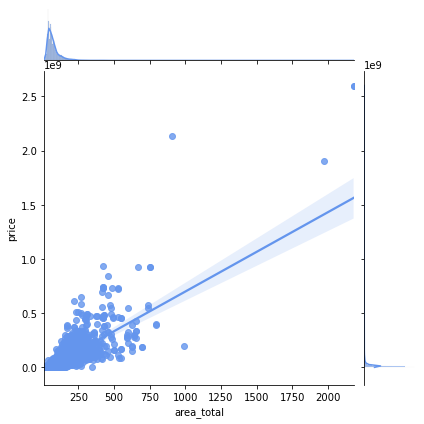

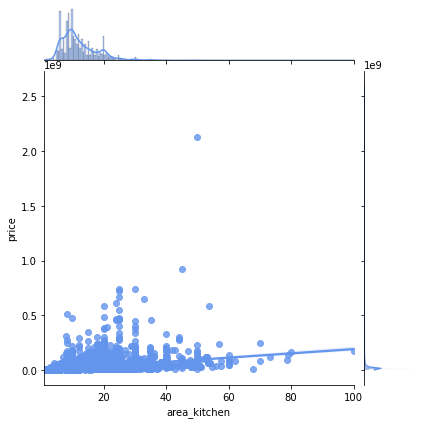

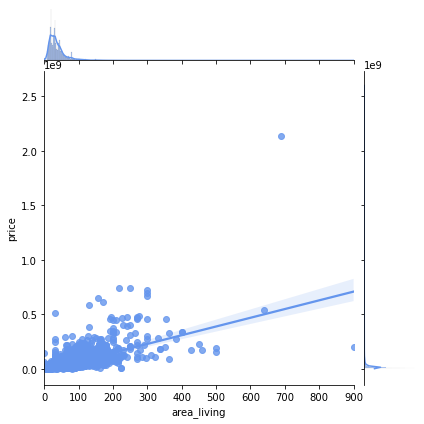

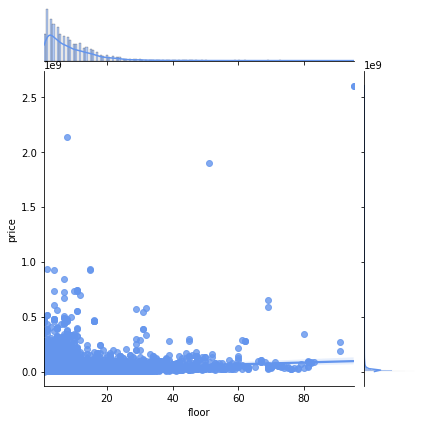

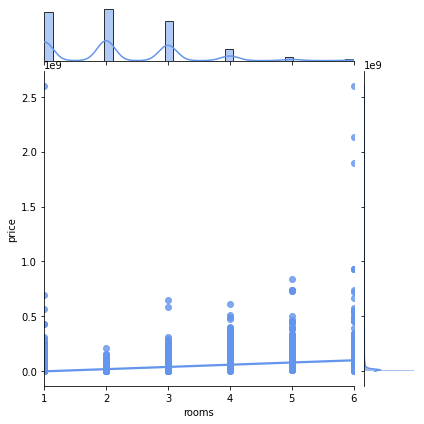

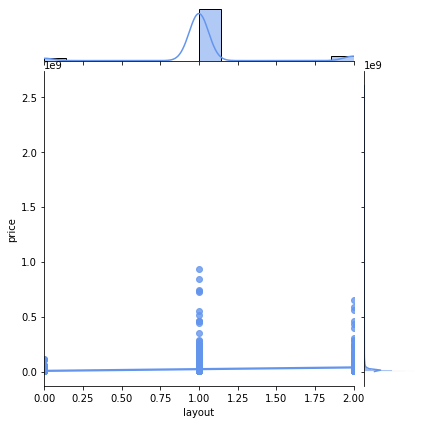

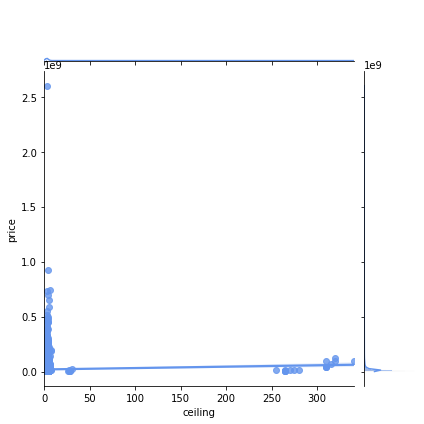

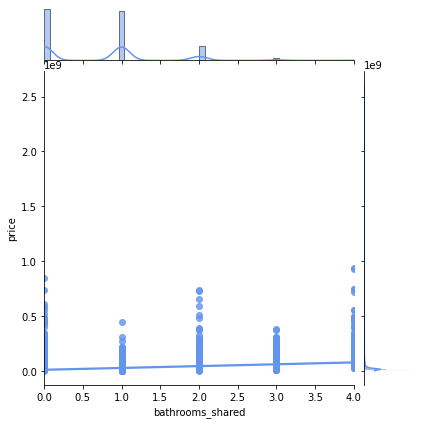

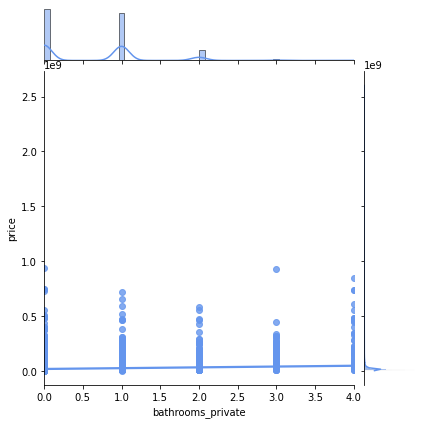

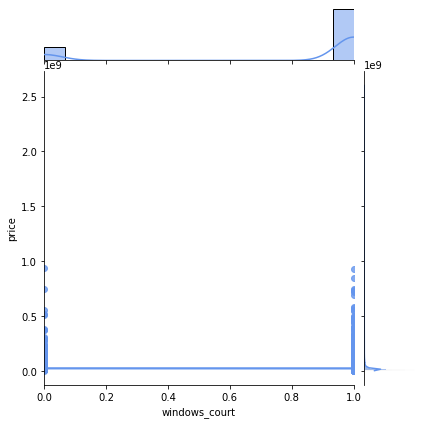

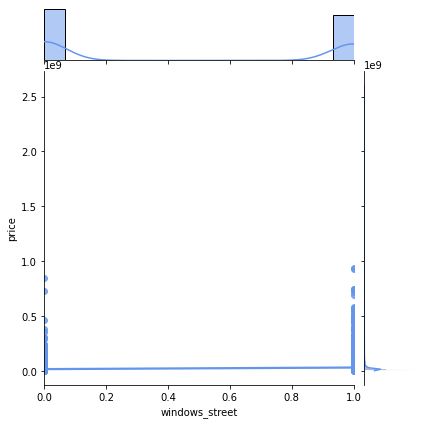

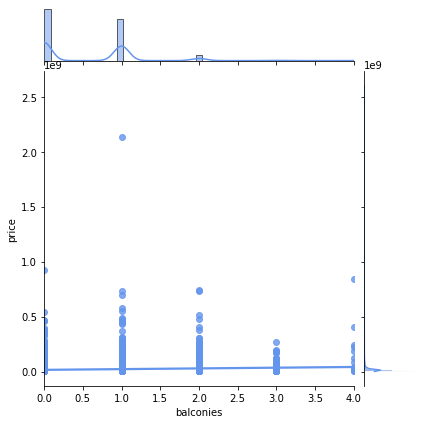

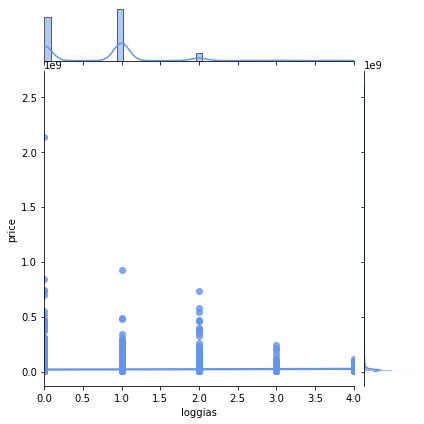

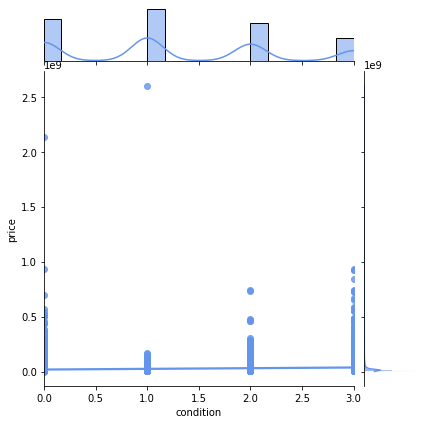

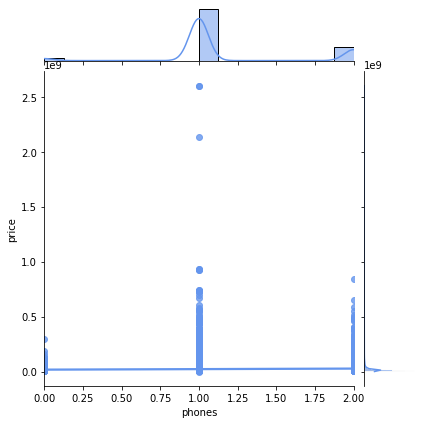

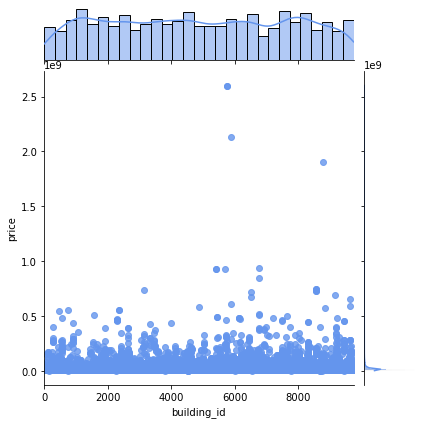

In [47]:
for col in x.columns[1:]:
    sns.jointplot(x=x.loc[:, col], y=y, kind="reg", color="#6495ED")

# Seller feature

<AxesSubplot:xlabel='seller', ylabel='price'>

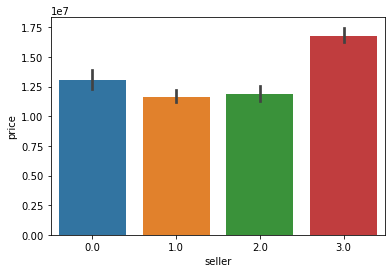

In [23]:
sns.barplot(x=x.loc[:,'seller'], y=y)

In [31]:
print(x['seller'].isna().sum())
print(x['seller'].size)
print(x['seller'].unique())

8830
23285
[ 3. nan  1.  2.  0.]


Seller doesn't seem like a very useful feature?

# Heatmap

In [39]:
heatmap_data = data.pivot_table(index='area_total',columns='rooms',values='price')

<AxesSubplot:xlabel='rooms', ylabel='area_total'>

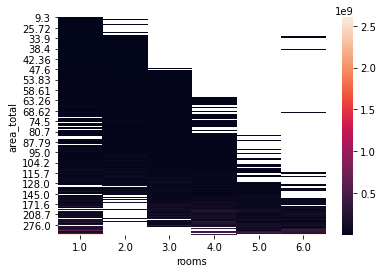

In [40]:
sns.heatmap(heatmap_data)

# Area vs rooms

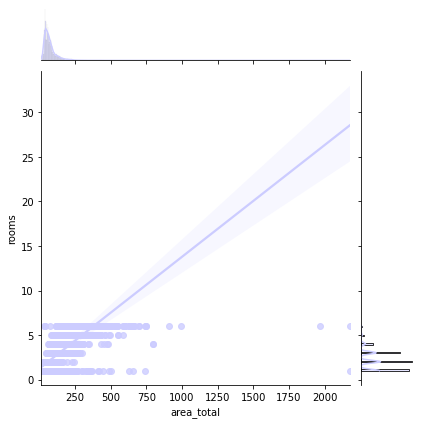

In [42]:
sns.jointplot(x=x.loc[:,'area_total'], y=x.loc[:,'rooms'], kind="reg", color="#CCCCFF")

<AxesSubplot:xlabel='area_total', ylabel='rooms'>

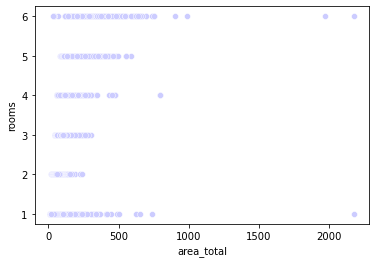

In [43]:
sns.scatterplot(x=x.loc[:,'area_total'], y=x.loc[:,'rooms'], color="#CCCCFF")

In [68]:
df = data[['area_total','price']]
df.describe()

,area_total,price
count,23285.000000,2.328500e+04
mean,74.450999,2.355617e+07
std,58.671373,5.264393e+07
min,9.300000,9.000000e+05
25%,42.000000,7.490000e+06
50%,59.800000,1.064500e+07
75%,84.800000,2.050000e+07
max,2181.000000,2.600000e+09


In [69]:
from scipy import stats
z_scores = stats.zscore(df)
print(z_scores)
df = df[(np.abs(stats.zscore(df['area_total'])) < 3)]
df.describe()

[[-0.25994495 -0.31184995]
 [ 0.23093531 -0.24801443]
 [ 0.069013   -0.27613509]
 ...
 [-0.01791371 -0.07135209]
 [ 0.44910431  0.12238762]
 [-0.28551163 -0.23946625]]


,area_total,price
count,23000.000000,2.300000e+04
mean,70.521548,2.043726e+07
std,40.325977,2.919135e+07
min,9.300000,9.000000e+05
25%,42.000000,7.449508e+06
50%,59.200000,1.050228e+07
75%,83.320000,1.990000e+07
max,250.300000,6.098021e+08


<AxesSubplot:xlabel='area_total', ylabel='price'>

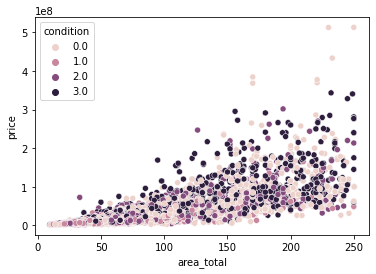

In [70]:
sns.scatterplot(x=df.loc[:,'area_total'], y=df['price'], hue=x['condition'])

# Three feature comparison

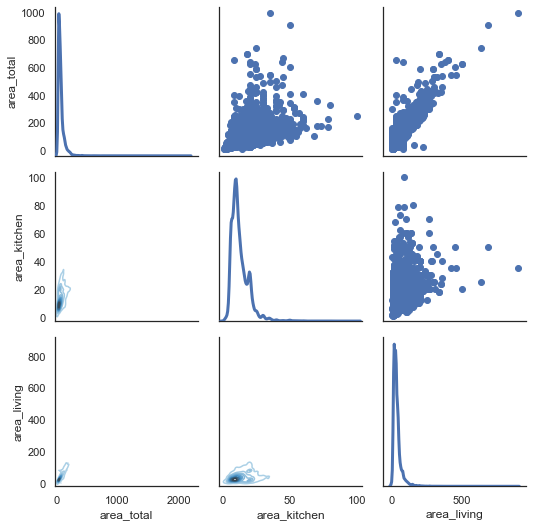

In [71]:
sns.set(style="white")
df = x.loc[:,['area_total','area_kitchen','area_living']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)